In [1]:
# import essential packages I believe will be useful later

import pandas as pd 
import numpy as np
import matplotlib
from matplotlib import pylab as plt

In [2]:
#ignore future warnings


import warnings

warnings.simplefilter("ignore", category = FutureWarning)

In [3]:
# read in the data

df = pd.read_csv("../data//winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# check the number of rows and columns

print('rows:' , df.shape[0])
print('columns:' , df.shape[1])

rows: 1599
columns: 12


In [5]:
# check the data types of each feature

for i in range(len(df.columns)):
    print(f'{df.columns[i]} {df.dtypes[i]}')

fixed acidity float64
volatile acidity float64
citric acid float64
residual sugar float64
chlorides float64
free sulfur dioxide float64
total sulfur dioxide float64
density float64
pH float64
sulphates float64
alcohol float64
quality int64


In [6]:
# check the amount of null values in each column

a = df['fixed acidity'].isna().sum()
b = df['volatile acidity'].isna().sum()
c = df['citric acid'].isna().sum()
d = df['residual sugar'].isna().sum()
e = df['chlorides'].isna().sum()
f = df['free sulfur dioxide'].isna().sum()
g = df['total sulfur dioxide'].isna().sum()
h = df['density'].isna().sum()
i = df['pH'].isna().sum()
j = df['sulphates'].isna().sum()
k = df['alcohol'].isna().sum()
l = df['quality'].isna().sum()


print("Missing fixed acidity count:", a)
print("Missing volatile acidity count:", b)
print("Missing citric acid count:", c)
print("Missing residual sugar count:", d)
print("Missing chlorides count:", e)
print("Missing free sulfur dioxide count:", f)
print("Missing total sulfur dioxide count:", g)
print("Missing density count:", h)
print("Missing pH count:", i)
print("Missing sulphates count:", j)
print("Missing alcohol count:", k)
print("Missing quality count:", l)

Missing fixed acidity count: 0
Missing volatile acidity count: 0
Missing citric acid count: 0
Missing residual sugar count: 0
Missing chlorides count: 0
Missing free sulfur dioxide count: 0
Missing total sulfur dioxide count: 0
Missing density count: 0
Missing pH count: 0
Missing sulphates count: 0
Missing alcohol count: 0
Missing quality count: 0


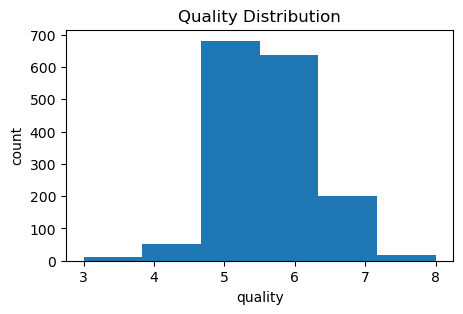

In [7]:
# check the distribution of the target variable

plt.figure(figsize=(5,3))
df['quality'].plot.hist(bins = df['quality'].nunique())                
plt.xlabel('quality')
plt.ylabel('count')
plt.title('Quality Distribution')
plt.savefig("../figures/HistogramCount.png", dpi = 300, bbox_inches = "tight")
plt.show()

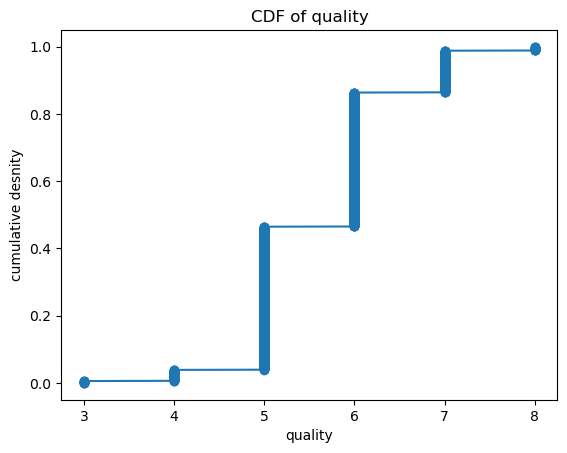

In [8]:
# No of data points used
N = 1599
  
# normal distribution
data = np.random.randn(N)
  
# sort the data in ascending order
x = np.sort(df['quality'])
  
# get the cdf values of y
y = np.arange(N) / float(N)
  
# plotting
plt.xlabel('quality')
plt.ylabel('cumulative desnity')
  
plt.title('CDF of quality')
plt.plot(x, y, marker='o')
plt.savefig("../Figures/CDFquality", dpi = 300, bbox_inches = "tight")
plt.show()

<Figure size 500x300 with 0 Axes>

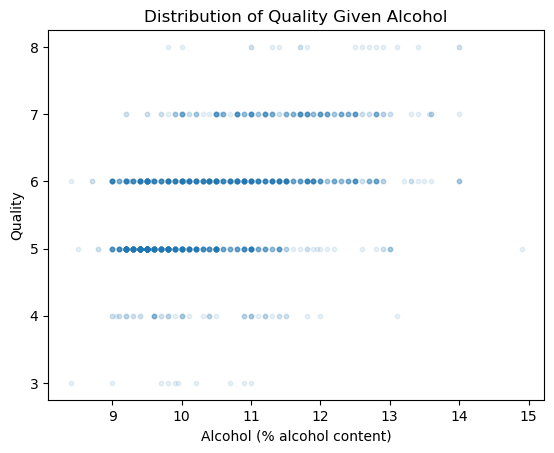

In [9]:
plt.figure(figsize=(5,3))
df.plot.scatter('alcohol','quality', s=10, alpha=0.1)
plt.title('Distribution of Quality Given Alcohol')
plt.xlabel('Alcohol (% alcohol content)')
plt.ylabel('Quality')
plt.savefig("../Figures/Scatterplot-alc", dpi = 300, bbox_inches = "tight")
plt.show()

<Figure size 500x300 with 0 Axes>

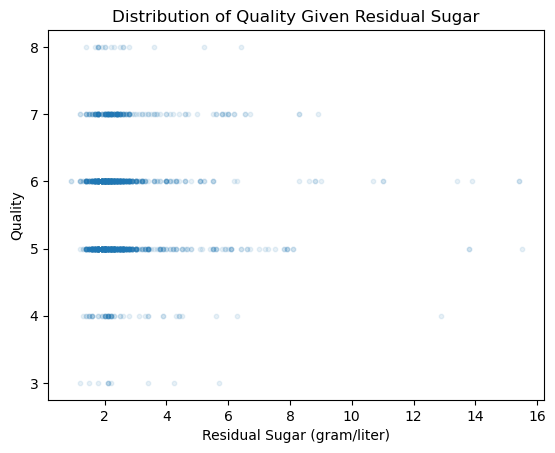

In [10]:
plt.figure(figsize=(5,3))
df.plot.scatter('residual sugar','quality', s=10, alpha=0.1)
plt.title('Distribution of Quality Given Residual Sugar')
plt.xlabel('Residual Sugar (gram/liter)')
plt.ylabel('Quality')
plt.savefig("../Figures/Scatterplot-rs", dpi = 300, bbox_inches = "tight")
plt.show()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


<AxesSubplot:>

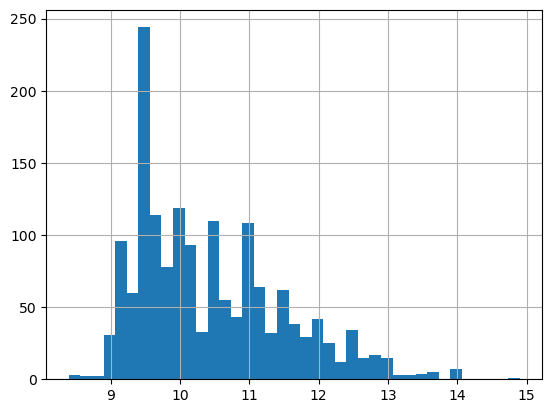

In [11]:
# use .describe() on price for summary statistics


print(df.alcohol.describe())
df.alcohol.hist(bins = int(np.sqrt(df.shape[0])))

# mean vs 50% 
# use for violin plots

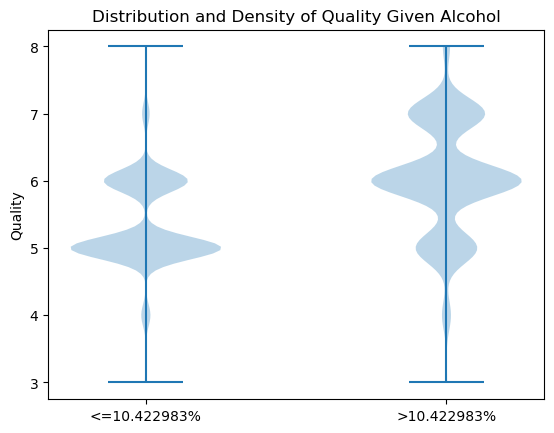

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
np.where(df['alcohol'] <= 10.422983, '<=10.422983', '>10.422983')
df['alcohol_category'] = np.where(df['alcohol'] <= 10.422983, '<=10.422983', '>10.422983')

dataset = [df[df.loc[:, 'alcohol_category']=='<=10.422983']['quality'].values,
           df[df.loc[:, 'alcohol_category']=='>10.422983']['quality'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=10.422983%','>10.422983%'])
plt.title('Distribution and Density of Quality Given Alcohol')
plt.ylabel('Quality')
plt.savefig("../Figures/Violinplot", dpi = 300, bbox_inches = "tight")
plt.show()

df.drop(columns=['alcohol_category'], inplace=True, axis = 1)
df.head()

In [13]:
# My data set has ~1600 rows and the wines are iid


from sklearn.model_selection import train_test_split

random_state = 3
y = df['quality']
X = df.loc[:, df.columns != 'quality']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6, random_state = random_state, shuffle = True)

X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, random_state = random_state, shuffle = True)

print(X_train.head())
print(X_train.shape)
print("\n")
print("\n")
print("\n")
print(X_val.head())
print(X_val.shape)
print("\n")
print("\n")
print("\n")
print(X_test.head())
print(X_test.shape)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
935            8.8              0.30         0.38             2.3      0.060   
516           12.5              0.60         0.49             4.3      0.100   
563            7.6              0.29         0.49             2.7      0.092   
857            8.2              0.26         0.34             2.5      0.073   
272           10.9              0.37         0.58             4.0      0.071   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
935                 19.0                  72.0  0.99543  3.39       0.72   
516                  5.0                  14.0  1.00100  3.25       0.74   
563                 25.0                  60.0  0.99710  3.31       0.61   
857                 16.0                  47.0  0.99594  3.40       0.78   
272                 17.0                  65.0  0.99935  3.22       0.78   

     alcohol  
935     11.8  
516     11.9  
563     10.1  
85

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


std_ftrs =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(959, 11)
(959, 11)
[[ 0.2560195  -1.23546992  0.54966297 ...  0.52266272  0.35545407
   1.32939976]
 [ 2.38200592  0.41856901  1.11685407 ... -0.38431281  0.4743313
   1.42476887]
 [-0.43348961 -1.29060455  1.11685407 ...  0.00439099 -0.29837069
  -0.29187525]
 ...
 [ 0.37093769 -0.68412361  0.80747711 ... -0.70823265 -0.35780931
   1.71087623]
 [-0.08873505 -1.18033529  0.65278862 ...  0.00439099  0.11769961
   0.75718505]
 [-0.4909487   0.30829975 -0.37846793 ... -1.35607232 -1.36826576
  -1.05482819]]


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import ParameterGrid

In [16]:
outputs = df['quality']
inputs = df.loc[:, df.columns != 'quality']

In [17]:
std_ftrs =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)])

def MLpipe_KFold_RMSE(X, y, preprocessor, model, param_grid):
    
    mod = []
    score = np.zeros(10)
    baseline_scorelist = []
    
    for i in range(10):
    
        X_other, X_test, y_other, y_test = train_test_split(inputs, outputs, train_size = 0.6, random_state = i)
        
        mean = np.mean(y_test)
        
        y_baseline = np.repeat(mean, len(y_test))
        
        RMSE = np.sqrt(mean_squared_error(y_test, y_baseline))

        kfold = KFold(n_splits = 3, random_state = i, shuffle = True)
        
        modeltype = model

        pipeline = make_pipeline(preprocessor, modeltype)

        grid = GridSearchCV(pipeline, param_grid = param_grid, scoring = "neg_root_mean_squared_error", n_jobs = -1, cv = kfold, verbose = 0, return_train_score = False)

        grid.fit(X_other, y_other)
        y_grid = grid.predict(X_test)
        score[i] = np.sqrt(mean_squared_error(y_test, y_grid))
        
        baseline_scorelist.append(RMSE)
        
    mean_score = np.average(score)
    std_score = np.std(score)
    baseline_score = np.average(baseline_scorelist)
    
    return mean_score, std_score, baseline_score

In [22]:
random_state = 3


lasso = Lasso(random_state = random_state, max_iter = 10000)
ridge = Ridge()
elasticnet = ElasticNet()
randomforest = RandomForestRegressor(random_state = random_state)
svr = SVR()
Kneighbor = KNeighborsRegressor()

lasso_param_grid = {
    'lasso__alpha': np.logspace(-7, 0, 29)
}

ridge_param_grid = {
    'ridge__alpha': np.logspace(-10, 0, 51)
}

elasticnet_param_grid = {
    'elasticnet__alpha': np.logspace(-2, 2, 21),
    'elasticnet__l1_ratio': np.linspace(0, 1, 21)[1:-1]
}

randomforest_param_grid = {
    'randomforestregressor__max_depth': [1, 2, 5, 7, 10],
    'randomforestregressor__max_features': [0.5, 0.75, 1.0]
}

svr_param_grid = {
   'svr__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
   'svr__C': [1e-1, 1e0, 1e1]
}

kneighborsregressor_param_grid = {
   'kneighborsregressor__n_neighbors': np.arange(1,11)
}

algos = [lasso, ridge, elasticnet, randomforest, svr, Kneighbor]
grids = [lasso_param_grid, ridge_param_grid, elasticnet_param_grid, randomforest_param_grid, 
         svr_param_grid, kneighborsregressor_param_grid]

In [25]:
names = []

for algo in algos:
    names.append(type(algo).__name__)
    
names

['Lasso',
 'Ridge',
 'ElasticNet',
 'RandomForestRegressor',
 'SVR',
 'KNeighborsRegressor']

In [32]:
mean = []
std = []

for diddy, kong in zip(algos, grids):
    mdl_mean, mdl_std, mdl_baseline = MLpipe_KFold_RMSE(inputs, outputs, preprocessor, diddy, kong)
    mean.append(mdl_mean)
    std.append(mdl_std)


In [33]:
print(mean)
print(std)

[0.6422057622741785, 0.6418998226484625, 0.6420801762257428, 0.6000968244807995, 0.62904383607743, 0.6646339120595638]
[0.009914002482423261, 0.010145893869002838, 0.009995537998236948, 0.012305413729662948, 0.013207025999553266, 0.015990465626120193]


In [ ]:
lasso_mean, lasso_std, lasso_baseline = MLpipe_KFold_RMSE(inputs, outputs, preprocessor, lasso, lasso_param_grid)
print('mean: ', lasso_mean)
print('std: ', lasso_std)
print('baseline: ', lasso_baseline)

print("\n")

ridge_mean, ridge_std, ridge_baseline = MLpipe_KFold_RMSE(inputs, outputs, preprocessor, ridge, ridge_param_grid)
print('mean: ', ridge_mean)
print('std: ', ridge_std)
print('baseline: ', ridge_baseline)

print("\n")

en_mean, en_std, en_baseline = MLpipe_KFold_RMSE(inputs, outputs, preprocessor, elasticnet, elasticnet_param_grid)
print('mean: ', en_mean)
print('std: ', en_std)
print('baseline: ', en_baseline)

print("\n")

rf_mean, rf_std, rf_baseline = MLpipe_KFold_RMSE(inputs, outputs, preprocessor, randomforest, randomforest_param_grid)
print('mean: ', rf_mean)
print('std: ', rf_std)
print('baseline: ', rf_baseline)

print("\n")

svr_mean, svr_std, svr_baseline = MLpipe_KFold_RMSE(inputs, outputs, preprocessor, svr, svr_param_grid)
print('mean: ', svr_mean)
print('std: ', svr_std)
print('baseline: ', svr_baseline)

print("\n")

Kneighbor_mean, Kneighbor_std, Kneighbor_baseline = MLpipe_KFold_RMSE(inputs, outputs, preprocessor, Kneighbor, kneighborsregressor_param_grid)
print('mean: ', Kneighbor_mean)
print('std: ', Kneighbor_std)
print('basline: ', Kneighbor_baseline)

In [81]:
import pickle
import xgboost
from sklearn import preprocessing

random_states = [1, 2, 3, 4, 5]
best_models = []

for i in random_states:
    
    X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6, random_state = i, shuffle = True)

    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, random_state = i, shuffle = True)
    
    X_train_prep = preprocessor.fit_transform(X_train)
    X_val_prep = preprocessor.transform(X_val)
    X_test_prep = preprocessor.transform(X_test)

    feature_names = preprocessor.get_feature_names_out()


    param_grid = {
        #"learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
        #"max_depth": [1, 3, 10, 15],
        #"n_estimators": [100],
        "missing": [np.nan], 
        "colsample_bytree": [0.9],              
        "subsample": [0.66]
    }

    learningrate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    maxdepth = [1, 3, 10, 15]
    nestimators = [10, 100, 300]
    

    models = []
    val_score = []
    baseline_scorelist = []


    for lr in learningrate:
        for md in maxdepth:
            for ne in nestimators:
                XGB = xgboost.XGBRegressor()
                XGB.set_params(learning_rate = lr, max_depth = md, n_estimators = ne, **ParameterGrid(param_grid)[0])
                XGB.fit(X_train_prep, y_train, early_stopping_rounds = 50,eval_set=[(X_val_prep, y_val)], verbose=False)
                y_pred = XGB.predict(X_val_prep)
                RMSE = np.sqrt(mean_squared_error(y_pred, y_val))             
                val_score.append(RMSE)
                models.append(XGB)
    meanie = np.mean(y_test)
    y_baseline = np.repeat(meanie, len(y_test))
    RMSE = np.sqrt(mean_squared_error(y_test, y_baseline))
    baseline_scorelist.append(RMSE)
    
    t_test = np.sqrt(mean_squared_error(y_test, models[np.argmin(val_score)].predict(X_test_prep)))
    best_models.append((models[np.argmax(val_score)], t_test, X_test_prep, y_test.values))

best_models = pd.DataFrame.from_records(best_models, columns = ['Model', 'Test Score', 'Test Set', 'Test True'])
file = open('../results/pickles/xgb.save', 'wb')
pickle.dump(best_models, file)
file.close()

In [36]:
baseline_scorelist

[0.8550402037331344]

In [37]:
pd.set_option('display.max_colwidth', None)
best_models

Model  \
0   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,\n             gamma=0, gpu_id=-1, importance_type=None,\n             interaction_constraints='', learning_rate=0.0001, max_delta_step=0,\n             max_depth=3, min_child_weight=1, missing=nan,\n             monotone_constraints='()', n_estimators=10, n_jobs=8,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, scale_pos_weight=1, subsample=0.66,\n             tree_method='exact', validate_parameters=1, verbosity=None)   
1   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,\n             gamma=0, gpu_id=-1, importance_type=None,\n             interaction_constraints='', learning_rate=0.0001, max_delta_step=0,\n             max_depth=1, min_child_weight=1, missing=nan,\n             monotone_constraints='()', n_estimators=10, n_jobs=8,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, scale_pos_weight=1, subsample=0.66,\n             tree_method='exact', validate_parameters=1, verbosity=None)   
2   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,\n             gamma=0, gpu_id=-1, importance_type=None,\n             interaction_constraints='', learning_rate=0.0001, max_delta_step=0,\n             max_depth=1, min_child_weight=1, missing=nan,\n             monotone_constraints='()', n_estimators=10, n_jobs=8,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, scale_pos_weight=1, subsample=0.66,\n             tree_method='exact', validate_parameters=1, verbosity=None)   
3  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,\n             gamma=0, gpu_id=-1, importance_type=None,\n             interaction_constraints='', learning_rate=0.0001, max_delta_step=0,\n             max_depth=10, min_child_weight=1, missing=nan,\n             monotone_constraints='()', n_estimators=10, n_jobs=8,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, scale_pos_weight=1, subsample=0.66,\n             tree_method='exact', validate_parameters=1, verbosity=None)   
4   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,\n             gamma=0, gpu_id=-1, importance_type=None,\n             interaction_constraints='', learning_rate=0.0001, max_delta_step=0,\n             max_depth=1, min_child_weight=1, missing=nan,\n             monotone_constraints='()', n_estimators=10, n_jobs=8,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, scale_pos_weight=1, subsample=0.66,\n             tree_method='exact', validate_parameters=1, verbosity=None)   

   Test Score  \
0    0.609596   
1    0.652090   
2    0.587294   
3    0.636265   
4    0.643647   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [39]:
print("mean: ", np.mean(best_models[["Test Score"]]))
print("standard devaition: ", np.std(best_models[["Test Score"]]))

mean:  Test Score    0.625779
dtype: float64
standard devaition:  Test Score    0.023935
dtype: float64


In [46]:
mean.append(np.mean(best_models[["Test Score"]].values))
std.append(np.std(best_models[["Test Score"]].values))
names.append('XGBoost')

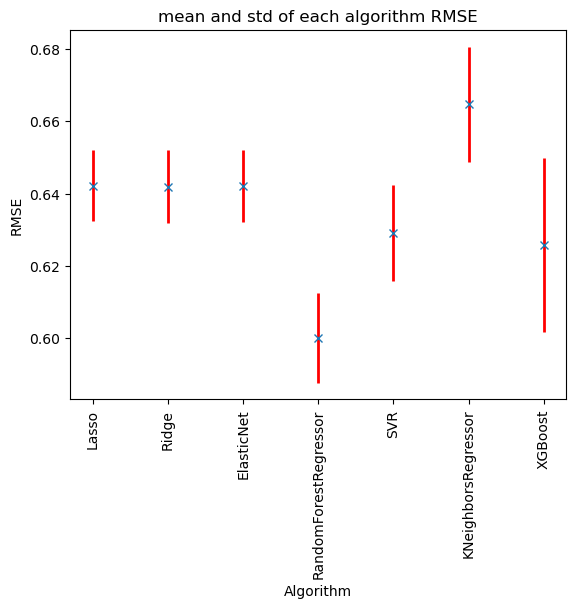

In [86]:
plt.errorbar(names, mean, yerr = std, elinewidth = 2, linestyle = "", marker = 'x', ecolor = "red")
plt.title ('mean and std of each algorithm RMSE')
plt.xlabel('Algorithm')
plt.xticks(rotation = 90)
plt.ylabel('RMSE')
plt.savefig("../Figures/uncertain", dpi = 300, bbox_inches = "tight")
plt.show()

In [58]:
pd.set_option('display.max_colwidth', None)
chosen_model = best_models.iloc[2, 0]

In [59]:
test_inp = chosen_model.get_booster().get_score(importance_type = 'total_gain')

def map_fields(betty: dict, sally):
    proper_dict = {}

    for field, val in betty.items():
        int_str = field[1:]
        int_frm = int(int_str)

        proper_dict[sally[int_frm]] = val

    return proper_dict

In [66]:
best_features = {}

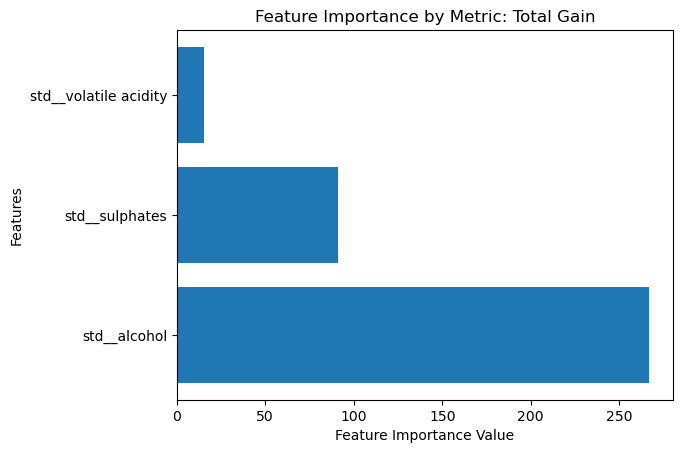

In [87]:
totalgain_importance = chosen_model.get_booster().get_score(importance_type = 'total_gain')
mapped_ftr_dict = map_fields(totalgain_importance, feature_names)
totalgain_importance = pd.Series(mapped_ftr_dict)
abs_totalgain_importances = np.abs(totalgain_importance).sort_values(ascending = False)[:3]
totalgain_feature_list = abs_totalgain_importances.index.to_list()
totalgain_values_list = list(abs_totalgain_importances.values)

plt.barh(range(3), abs_totalgain_importances)
plt.yticks(range(3), totalgain_feature_list)
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("Feature Importance by Metric: Total Gain")
best_features['Total Gain Importance'] = totalgain_feature_list
plt.savefig("../Figures/total gain", dpi = 300, bbox_inches = "tight")
plt.show();

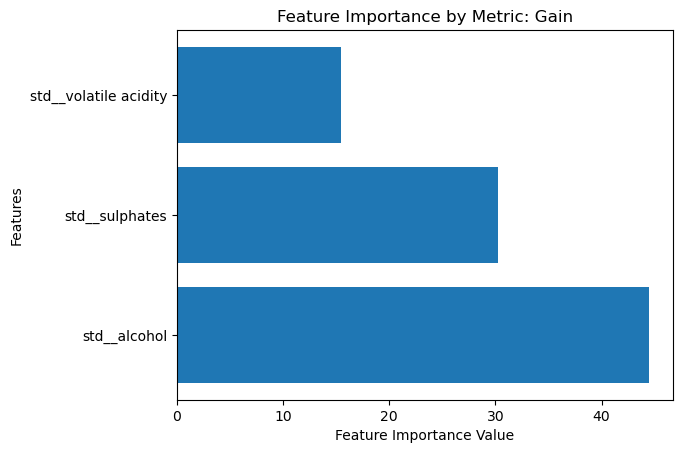

In [88]:
gain_importance = chosen_model.get_booster().get_score(importance_type = 'gain')
mapped_ftr_dict = map_fields(gain_importance, feature_names)
gain_importance = pd.Series(mapped_ftr_dict)
abs_gain_importances = np.abs(gain_importance).sort_values(ascending = False)[:3]
gain_feature_list = abs_gain_importances.index.to_list()
gain_values_list = list(abs_gain_importances.values)

plt.barh(range(3), abs_gain_importances)
plt.yticks(range(3), gain_feature_list)
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("Feature Importance by Metric: Gain")
best_features['Gain Importance'] = gain_feature_list
plt.savefig("../Figures/gain", dpi = 300, bbox_inches = "tight")
plt.show();

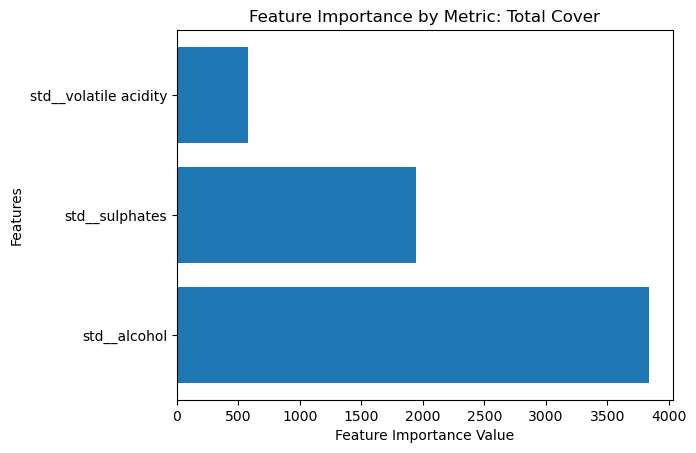

In [89]:
totalcover_importance = chosen_model.get_booster().get_score(importance_type = 'total_cover')
mapped_ftr_dict = map_fields(totalcover_importance, feature_names)
totalcover_importance = pd.Series(mapped_ftr_dict)
abs_totalcover_importances = np.abs(totalcover_importance).sort_values(ascending = False)[:3]
totalcover_feature_list = abs_totalcover_importances.index.to_list()
totalcover_values_list = list(abs_totalcover_importances.values)

plt.barh(range(3), abs_totalcover_importances)
plt.yticks(range(3), totalcover_feature_list)
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("Feature Importance by Metric: Total Cover")
# for index, value in enumerate(abs_totcover_importances):
#     plt.text(value, index, str(value))
best_features['Total Cover Importance'] = totalcover_feature_list
plt.savefig("../Figures/total cover", dpi = 300, bbox_inches = "tight")
plt.show();

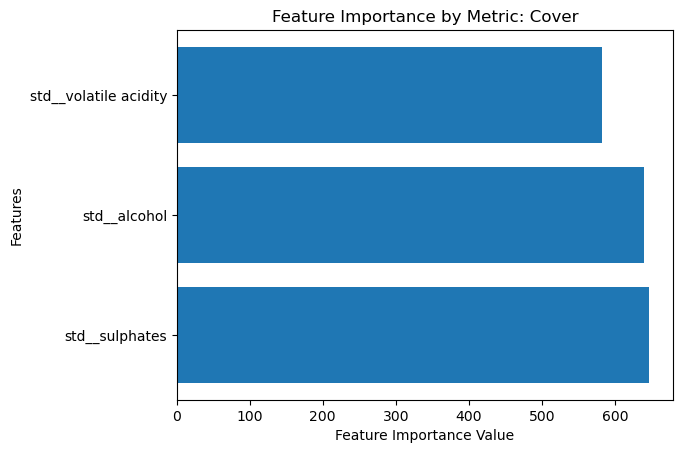

In [90]:
cover_importance = chosen_model.get_booster().get_score(importance_type = 'cover')
mapped_ftr_dict = map_fields(cover_importance, feature_names)
cover_importance = pd.Series(mapped_ftr_dict)
abs_cover_importances = np.abs(cover_importance).sort_values(ascending=False)[:3]
cover_feature_list = abs_cover_importances.index.to_list()
cover_values_list = list(abs_cover_importances.values)

plt.barh(range(3), abs_cover_importances)
plt.yticks(range(3), cover_feature_list)
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("Feature Importance by Metric: Cover")
# for index, value in enumerate(abs_cover_importances):
#     plt.text(value, index, str(value))
best_features['Cover Importance'] = cover_feature_list
plt.savefig("../Figures/cover", dpi = 300, bbox_inches = "tight")
plt.show();

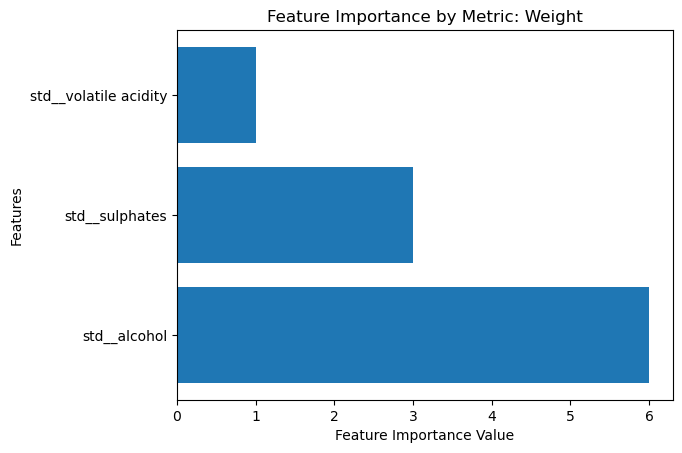

In [94]:
weight_importance = chosen_model.get_booster().get_score(importance_type='weight')
mapped_ftr_dict = map_fields(weight_importance, feature_names)
weight_importance = pd.Series(mapped_ftr_dict)
abs_weight_importances = np.abs(weight_importance).sort_values(ascending=False)[:3]
weight_feature_list = abs_weight_importances.index.to_list()
weight_values_list = list(abs_weight_importances.values)

plt.barh(range(3), abs_weight_importances)
plt.yticks(range(3), weight_feature_list)
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("Feature Importance by Metric: Weight")
# for index, value in enumerate(abs_weight_importances):
#     plt.text(value, index, str(value))
best_features['Weight Importance'] = weight_feature_list
plt.savefig("../Figures/weight", dpi = 300, bbox_inches = "tight")
plt.show();

In [72]:
best_features

{'Total Gain Importance': ['std__alcohol',
  'std__sulphates',
  'std__volatile acidity'],
 'Gain Importance': ['std__alcohol',
  'std__sulphates',
  'std__volatile acidity'],
 'Total Cover Importance': ['std__alcohol',
  'std__sulphates',
  'std__volatile acidity'],
 'Cover Importance': ['std__sulphates',
  'std__alcohol',
  'std__volatile acidity'],
 'Weight Importance': ['std__alcohol',
  'std__sulphates',
  'std__volatile acidity']}

In [73]:
ft_df = pd.DataFrame.from_records(best_features).reset_index()
ft_df.sort_values(by = 'index').reset_index(drop = True).drop(columns = 'index')

,Cover Importance,Gain Importance,Total Cover Importance,Total Gain Importance,Weight Importance
0,std__sulphates,std__alcohol,std__alcohol,std__alcohol,std__alcohol
1,std__alcohol,std__sulphates,std__sulphates,std__sulphates,std__sulphates
2,std__volatile acidity,std__volatile acidity,std__volatile acidity,std__volatile acidity,std__volatile acidity


In [75]:
import shap

In [80]:
feature_names

5.6419683


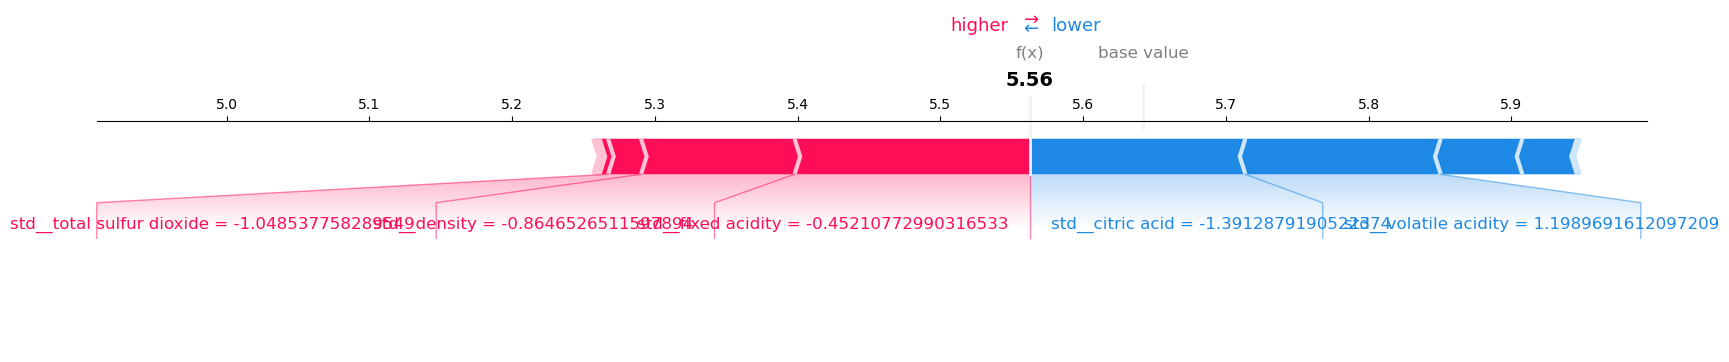

In [99]:
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_test_prep)

index = 0
print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test_prep[index,:], feature_names = feature_names, matplotlib = True, show = False,)
plt.title(" ")
plt.savefig("../Figures/force1", dpi = 300, bbox_inches = "tight")
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


5.6419683


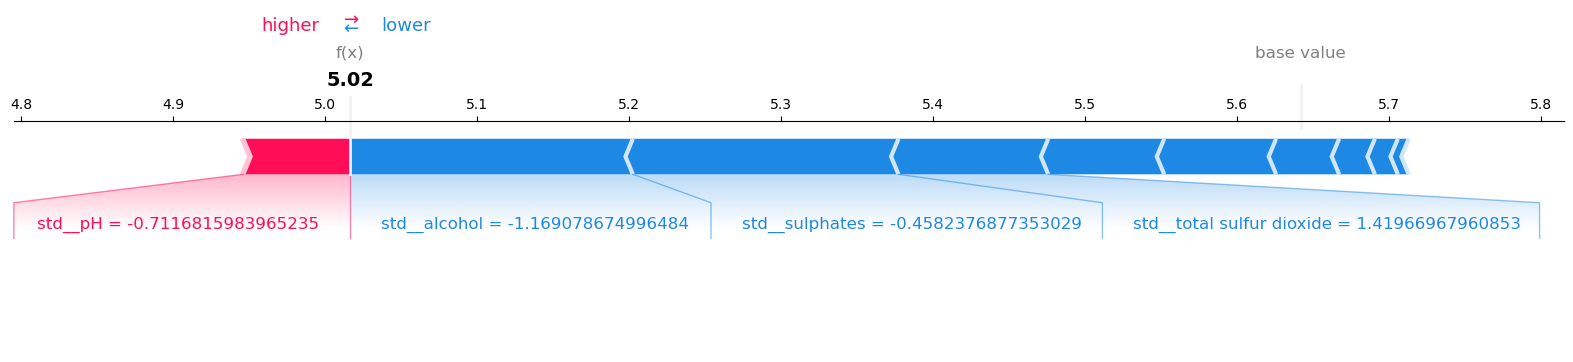

In [98]:
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_test_prep)

index = 100
print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test_prep[index,:], feature_names = feature_names, matplotlib = True, show = False,)
plt.title(" ")
plt.savefig("../Figures/force2", dpi = 300, bbox_inches = "tight")
plt.show()

5.6419683


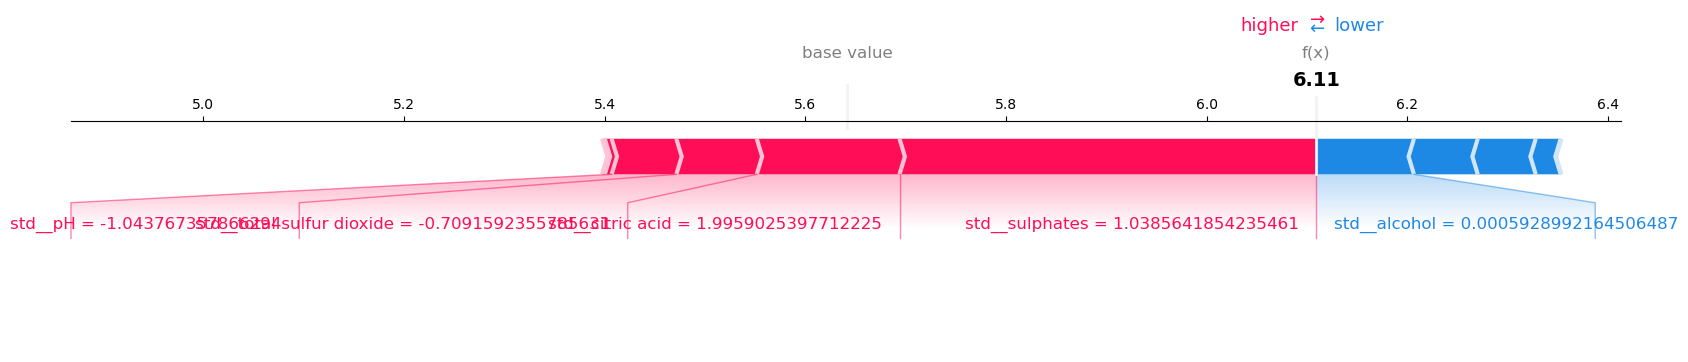

In [100]:
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_test_prep)

index = 200
print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test_prep[index,:], feature_names = feature_names, matplotlib = True, show = False,)
plt.title(" ")
plt.savefig("../Figures/force3", dpi = 300, bbox_inches = "tight")
plt.show()